In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import date
from scipy.optimize import curve_fit

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
experiment = 'Activity'

In [5]:
today = date.today()
print(today)
path = os.getcwd()

mypath = fr'{experiment}/Results/Plots/{today}' 
if not os.path.isdir(mypath):
    os.makedirs(mypath)


2023-09-28


In [6]:
files = os.listdir(rf'{path}/{experiment}/Rawdata')

In [7]:
files

['230925_PoC_Rawdata_Separate_Cuvette1_Ac.xlsx']

In [9]:
def plotting_separate(tag, time, vAc):
    
    fig, ax = plt.subplots(1,1, figsize = (9.5,6.5))
    
    
    ax.plot(time, vAc, label = 'Actvity', marker = 'o',ls = '--', color = 'tab:red')
    
    
    ax.set_xlim(0,)
    
    ax.set_ylabel('Volumetric Activity in U mL$^{-1}$', fontsize = 14)
    
    ax.set_xlabel('Time in min', fontsize = 14)
    
    ax.tick_params(labelsize = 14)
    
    
    fig.legend(bbox_to_anchor = (0.88,0.85),fontsize = 14)
        
    ax.set_title(f'{tag}', fontsize = 14, fontweight = 'bold')
    fig.tight_layout()
    fig.savefig(f'{experiment}\Results\Plots\{today}\{today}_tag_esty0.png', dpi = 600)

In [10]:
def plotting_curve_fit(tag, time, vAc, t_fit, y_fit, k, delta_vAc, vAc_diff, normalization):
    
    fig, ax = plt.subplots(1,1, figsize = (9.5,6.5))
    
    ax1 = ax.twinx()
    ax.scatter(time, vAc, label = 'vAc', color = 'tab:red')
    ax.plot(t_fit, y_fit, color = 'tab:red')
    ax1.plot(t_fit, vAc_diff, color = 'tab:blue')
    #ax.fill_between(t_fit, y_fit+error, y_fit-error, color = 'tab:red', alpha = 0.15)
       
    ax.set_xlim(0,)
    
    ax.set_xlabel('Time in min', fontsize = 14)
    ax1.set_ylabel('ΔvAc/Δt in nm/min', fontsize = 14, color = 'tab:blue')
    
    ax.tick_params(labelsize = 14)
    ax1.tick_params(labelsize = 14)
    
    ax.set_title(f'{tag}, k = {np.round(k, 4)}, ΔvAc = {np.round(delta_vAc, 2)}', fontsize = 14, fontweight = 'bold')
    
    if normalization == True:
        ax.set_ylabel('Normalized Volumetric Activity in U mL$^{-1}$', fontsize = 14, color = 'tab:red')
        fig.tight_layout()
        fig.savefig(f'{experiment}\Results\Plots\{today}\{today}_fit_{tag}_esty0_norm.png', dpi = 600)
        
    else:
        ax.set_ylabel('Volumetric Activity in U mL$^{-1}$', fontsize = 14, color = 'tab:red')
        fig.tight_layout()
        fig.savefig(f'{experiment}\Results\Plots\{today}\{today}_fit_{tag}_esty0.png', dpi = 600)

In [11]:
def exponential_decay(t, y, k, d):
    return (y-d) * np.exp(-k * t) + d

def exponential_decay_deriv(t, y, k, d):
    return -k*(y-d) * np.exp(-k * t)


In [12]:
def increasing_exponential2(t, y, k, d):
    return (y-d) * (1 - np.exp(k * t)) + d

def increasing_exponential_derivative2(t, y, k, d):
    return k * (y - d) * np.exp(k * t)


In [13]:
def logistic_function(t, y, k, d):
    return y / (1 + np.exp(-k * t)) + d

def logistic_function_derivative(t, y, k, d):
    numerator = k * y * np.exp(-k * t)
    denominator = (1 + np.exp(-k * t)) ** 2
    return numerator / denominator


In [14]:
def optimizer(time, data):
    
    def logistic_function(t, y, k, d):
        return (y-d) * (1 - np.exp(k * t)) + d

    popt, pcov = curve_fit(logistic_function, time, data, p0 = [data.iloc[-1], 0.01,-2])
    
    y_fit, k_fit, d_fit = popt
    
    y_std, k_std, d_std = np.sqrt(np.diag(pcov))
    t_fit = np.linspace(0, np.max(time), 100)
    
    vAc_fit = logistic_function(t_fit, y_fit, k_fit, d_fit)
    vAc_diff = logistic_function_derivative(t_fit, y_fit, k_fit, d_fit)
    #print(k_fit)
    
    return vAc_fit, y_fit, y_std, k_fit, k_std, t_fit, d_fit, d_std, vAc_diff


In [15]:
init_param = 1

In [16]:
norm = False

FileNotFoundError: [Errno 2] No such file or directory: '/Users/fabian/Downloads/FL/Proof_of_Concept\\Activity/Rawdata/230925_PoC_Rawdata_Separate_Cuvette1_Ac.xlsx'

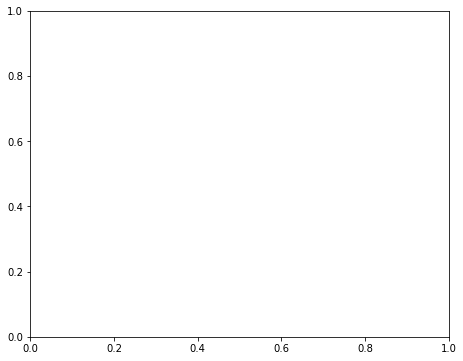

In [18]:
### normalized data ####

fig2, ax2 = plt.subplots(1,1, figsize = (7.5,6))

for file in files:
    
    sheets_dict = pd.read_excel(fr'{path}/{experiment}/Rawdata/{file}', sheet_name=None)
        
       
    for sheet, data in sheets_dict.items():
    
        ## read data ##

        label = sheet
        
        t = data['Time']
        #t = data['Process Time [min]']
        t_sim = t-t[0]
        
        data['n_vAc'] = (data['vAc']-data['vAc'].min())/(data['vAc'].max()-data['vAc'].min())
        
        if norm == True:
            vAc = data['n_vAc']
            
        else:
            vAc = data['vAc']
            

        
        ## plotting ##

        plotting_separate(label, t_sim, vAc)

        ax2.plot(t, vAc, label = label)
        

        ax2.tick_params(labelsize = 14)
        

        ax2.set_xlim(0,)
       

        ax2.set_ylabel('Normalized Volumetric Activity in U mL$^{-1}$', fontsize = 14)
        
        ax2.set_xlabel('Time in h', fontsize = 14)

       
        ax2.legend(ncol = len(label),fontsize = 12)

        fig2.tight_layout()
        fig2.savefig(rf'{experiment}/Results/Plots/{today}_alldata.png', dpi = 600)

        ## fit curves ##
        vAc_fit, y_fit, y_std, k_fit, k_std, t_fit, d_fit, d_std, vAc_diff = optimizer(t_sim, vAc)

        delta_vAc = vAc[0]-d_fit
        #print(t,aew)
        plotting_curve_fit(label, t_sim, vAc, t_fit, vAc_fit, k_fit, delta_vAc, vAc_diff, norm)

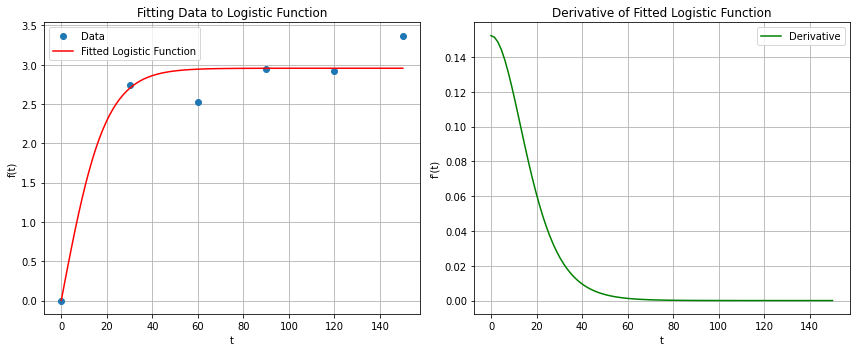

Fitted Parameters:
y_fit: 5.9071471017157515
k_fit: 0.10311606951760711
d_fit: -2.951729659279896


In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the logistic function
def logistic_function(t, y, k, d):
    return y / (1 + np.exp(-k * t)) + d

# Define the derivative of the logistic function
def logistic_function_derivative(t, y, k, d):
    numerator = k * y * np.exp(-k * t)
    denominator = (1 + np.exp(-k * t)) ** 2
    return numerator / denominator

# Input parameters
t_data = np.array([0, 30, 60, 90, 120,150])
y_data = np.array([0,2.74,2.53,2.95,2.92,3.37])

# Fit the logistic function to the data
params, covariance = curve_fit(logistic_function, t_data, y_data, p0=(y_data[-1], k_value, d_value))

# Extract the fitted parameters
y_fit, k_fit, d_fit = params

# Calculate the logistic function values using the fitted parameters
t_values = np.linspace(0, 150, 100)  # Extend the range for visualization
logistic_values = logistic_function(t_values, y_fit, k_fit, d_fit)

# Calculate the derivative of the logistic function using the fitted parameters
derivative_values = logistic_function_derivative(t_values, y_fit, k_fit, d_fit)

# Plot the data, fitted logistic function, and its derivative
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(t_data, y_data, marker='o', linestyle='', label='Data')
plt.plot(t_values, logistic_values, label='Fitted Logistic Function', color='red')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Fitting Data to Logistic Function')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t_values, derivative_values, label='Derivative', color='green')
plt.xlabel('t')
plt.ylabel("f'(t)")
plt.title('Derivative of Fitted Logistic Function')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Print the fitted parameters
print('Fitted Parameters:')
print(f'y_fit: {y_fit}')
print(f'k_fit: {k_fit}')
print(f'd_fit: {d_fit}')
